In [1]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#df_raw=pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time')
df_raw=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [4]:
def describe(df):
    return pd.concat([df.describe().T, df.skew().rename('skew'),], axis=1)

describe(df_raw)

,count,mean,std,min,25%,50%,75%,max,skew
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07,-2.247226
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30,219.389036
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51,48.367484
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00,-0.197257
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00,-0.089381


In [5]:
df_raw.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [6]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

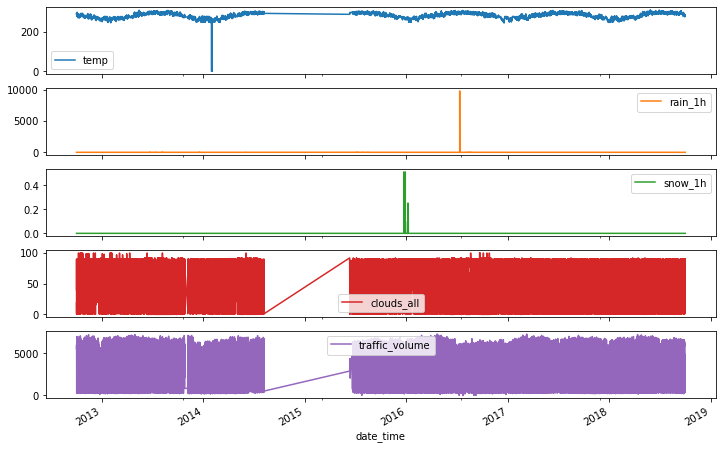

In [7]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


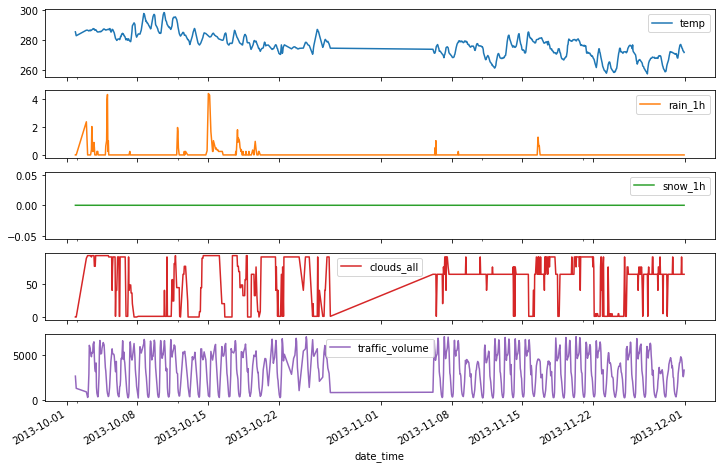

In [8]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-08-08 00:00:00,None,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,None,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,None,287.586,0.0,0.0,92,Rain,light rain,2886


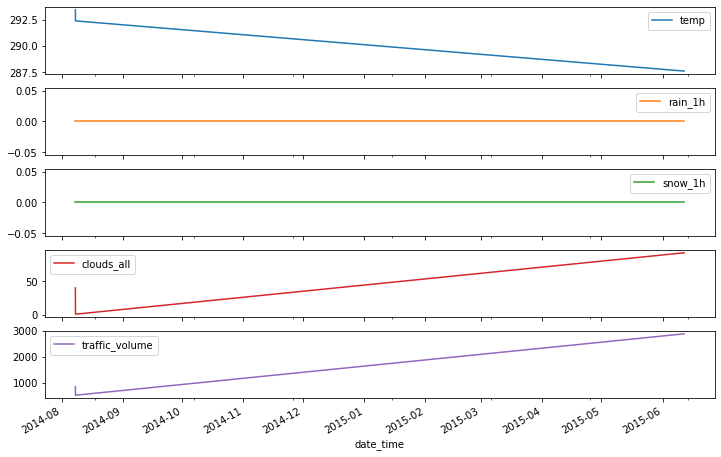

In [9]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [10]:
df_raw.describe(datetime_is_numeric=True).transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [11]:
df_raw.describe(include='object').transpose()

,count,unique,top,freq
holiday,48204,12,None,48143
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


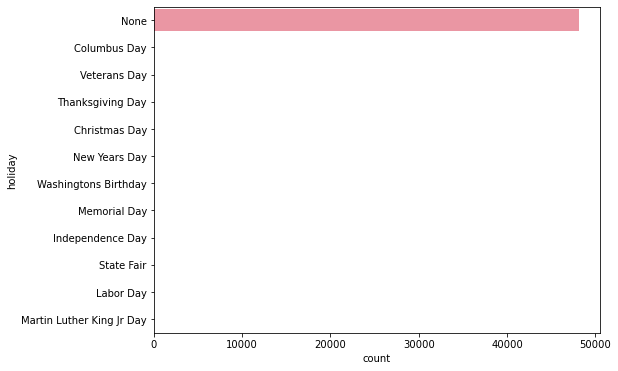

In [12]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_raw)
plt.show()

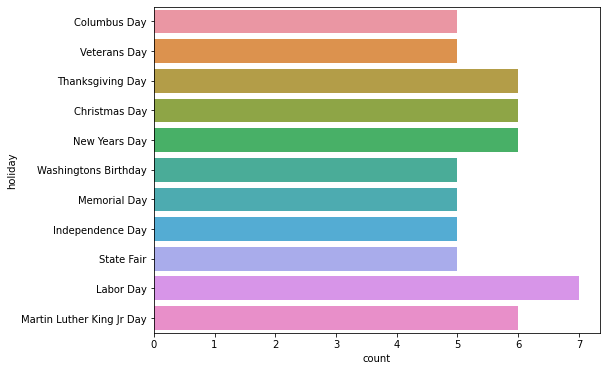

In [13]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_raw.loc[df_raw.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

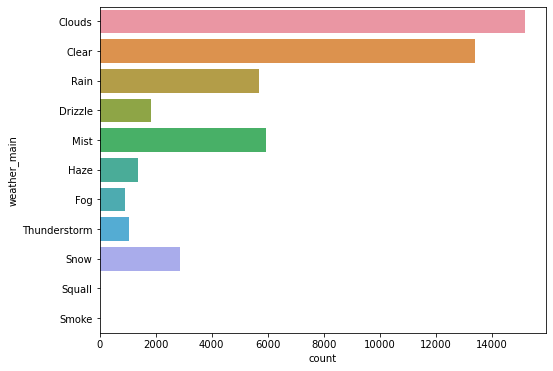

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

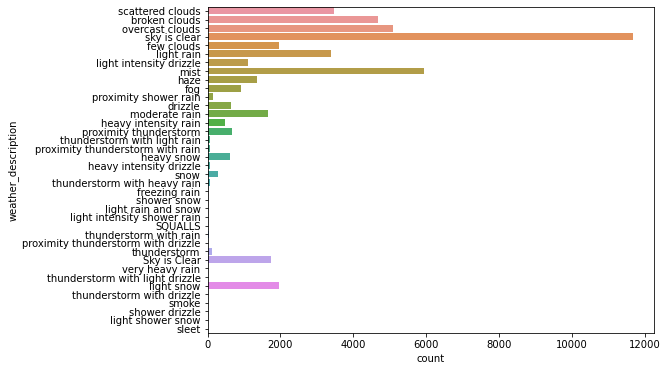

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

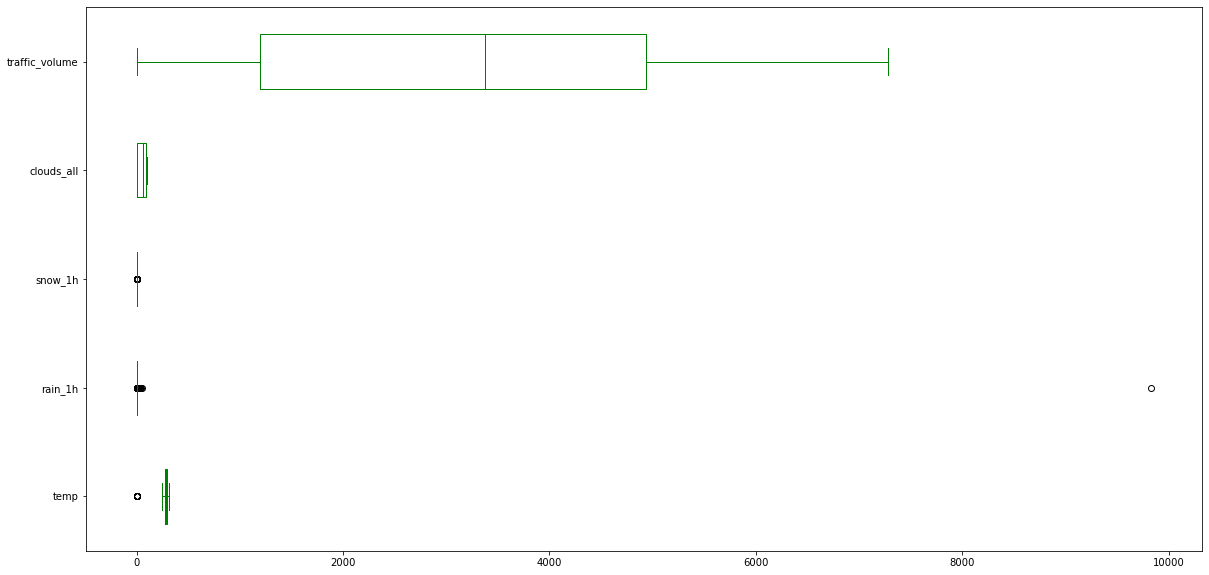

In [16]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

In [17]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,962


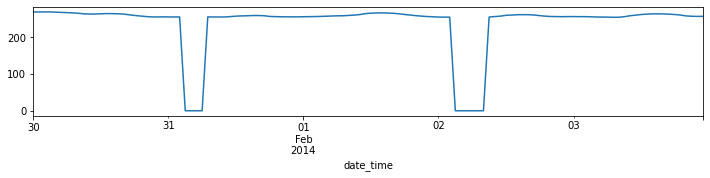

In [18]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [19]:
df_raw['2014-01-31']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,5269


In [20]:
df_raw['2014-02-02']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 00:00:00,None,255.59,0.0,0.0,0,Clear,sky is clear,1143
2014-02-02 01:00:00,None,255.48,0.0,0.0,0,Clear,sky is clear,695
2014-02-02 02:00:00,None,255.37,0.0,0.0,0,Clear,sky is clear,539
2014-02-02 03:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,1670


In [21]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan 
df_1[bad_temps]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,962


In [22]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14000000000004
258.4327777777778


In [23]:
df_1[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,5150


In [24]:
df_1[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,1670


In [25]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [26]:
# Set day 2 values
df_1.loc[bad_temps & day_2, 'temp'] = df_1[day_2].temp.mean()
df_1.loc[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,1670


In [27]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,5269


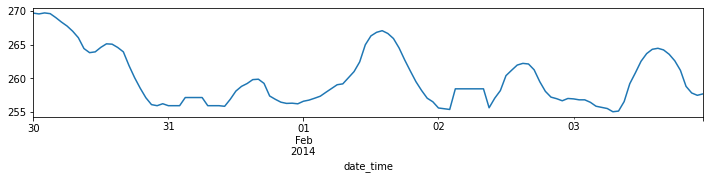

In [28]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [29]:
df_1[df_1.rain_1h > 100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-07-11 17:00:00,None,302.11,9831.3,0.0,75,Rain,very heavy rain,5535


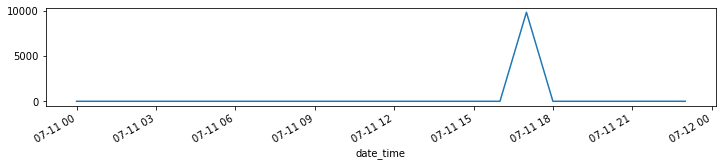

In [30]:
plot_features = df_1['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

In [31]:
df_2 = df_1.copy()
df_2.loc['2016-07-11 17:00:00','rain_1h'] = np.nan
df_2.loc['2016-07-11 17:00:00','rain_1h'] = df_2.rain_1h.mean()

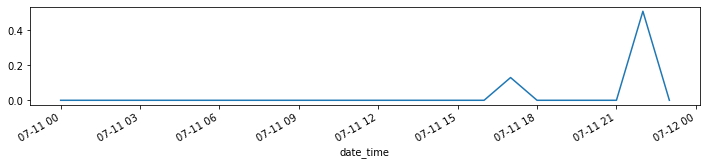

In [32]:
plot_features = df_2['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

In [33]:
df_2[(df_2.snow_1h > .2)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Rain,moderate rain,5167
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Snow,snow,5167
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Mist,mist,5167
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Fog,fog,5167
2015-12-23 14:00:00,None,273.74,0.00,0.32,90,Snow,light snow,5182
2015-12-23 14:00:00,None,273.74,0.00,0.32,90,Mist,mist,5182
2015-12-23 14:00:00,None,273.74,0.00,0.32,90,Rain,moderate rain,5182
2015-12-23 16:00:00,None,273.86,0.00,0.32,90,Snow,light snow,5222
2015-12-23 16:00:00,None,273.86,0.00,0.32,90,Mist,mist,5222


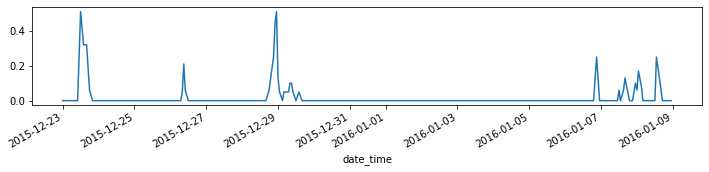

In [34]:
plot_features = df_2['2015-12-23':'2016-01-08'].snow_1h
_ = plot_features.plot(figsize=(12,2))

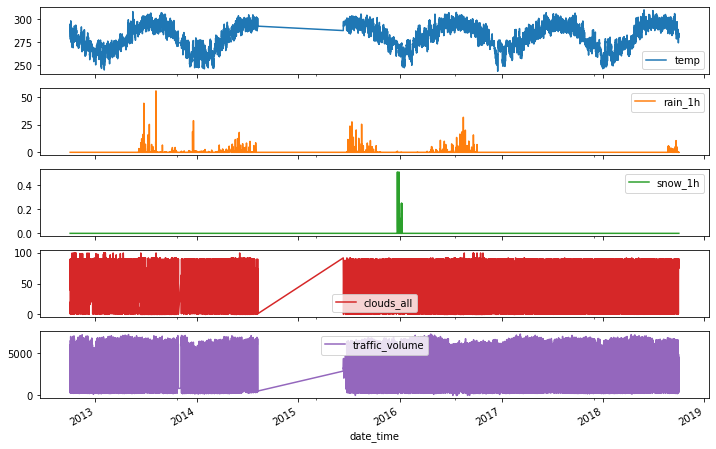

In [35]:
plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [36]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [37]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               48204 non-null  object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  uint8  
 7   weather_Clouds        48204 non-null  uint8  
 8   weather_Drizzle       48204 non-null  uint8  
 9   weather_Fog           48204 non-null  uint8  
 10  weather_Haze          48204 non-null  uint8  
 11  weather_Mist          48204 non-null  uint8  
 12  weather_Rain          48204 non-null  uint8  
 13  weather_Smoke         48204 non-null  uint8  
 14  weather_Snow          48204 non-nul

In [38]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  uint8  
 6   weather_Clouds        48204 non-null  uint8  
 7   weather_Drizzle       48204 non-null  uint8  
 8   weather_Fog           48204 non-null  uint8  
 9   weather_Haze          48204 non-null  uint8  
 10  weather_Mist          48204 non-null  uint8  
 11  weather_Rain          48204 non-null  uint8  
 12  weather_Smoke         48204 non-null  uint8  
 13  weather_Snow          48204 non-null  uint8  
 14  weather_Squall        48204 non-nul

In [39]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-08,273.08,0.0,0.0,20,455,0,1,0,0,0,0,0,0,0,0,0,1
2012-11-12,288.12,0.0,0.0,87,1000,1,0,0,0,0,0,0,0,0,0,0,1
2012-11-22,278.54,0.0,0.0,20,919,0,0,0,0,0,1,0,0,0,0,0,1
2012-12-25,264.40,0.0,0.0,90,803,0,1,0,0,0,0,0,0,0,0,0,1
2013-01-01,263.49,0.0,0.0,58,1439,0,1,0,0,0,0,0,0,0,0,0,1


In [41]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='date_time', length=48204)

In [42]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  uint8  
 6   weather_Clouds        48204 non-null  uint8  
 7   weather_Drizzle       48204 non-null  uint8  
 8   weather_Fog           48204 non-null  uint8  
 9   weather_Haze          48204 non-null  uint8  
 10  weather_Mist          48204 non-null  uint8  
 11  weather_Rain          48204 non-null  uint8  
 12  weather_Smoke         48204 non-null  uint8  
 13  weather_Snow          48204 non-null  uint8  
 14  weather_Squall        48204 non-nul

In [43]:
# Check sample values that are expected NOT TO BE a weekend
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=34501)

In [44]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=13703)

In [45]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

In [46]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,...,0,0,0,0,0,0,0.866025,5.000000e-01,-0.999837,0.018058
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,...,0,0,0,0,0,0,0.965926,2.588190e-01,-0.999824,0.018775
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,...,0,0,0,0,0,0,1.000000,8.867710e-12,-0.999810,0.019492
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,...,0,0,0,0,0,0,0.965926,-2.588190e-01,-0.999796,0.020208
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,...,0,0,0,0,0,0,0.866025,-5.000000e-01,-0.999781,0.020925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,0,1,0,0,0,...,0,0,0,0,0,1,-0.500000,-8.660254e-01,-0.999855,-0.017005
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,0,1,0,0,0,...,0,0,0,0,0,1,-0.707107,-7.071068e-01,-0.999867,-0.016288
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,0,0,0,0,0,...,0,0,0,1,0,1,-0.866025,-5.000000e-01,-0.999879,-0.015571


Text(0.5, 1.0, 'Time of day signal')

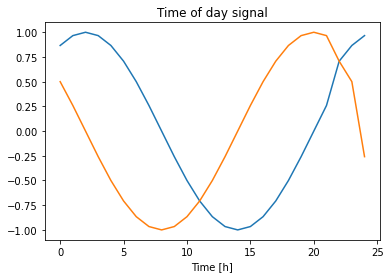

In [47]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

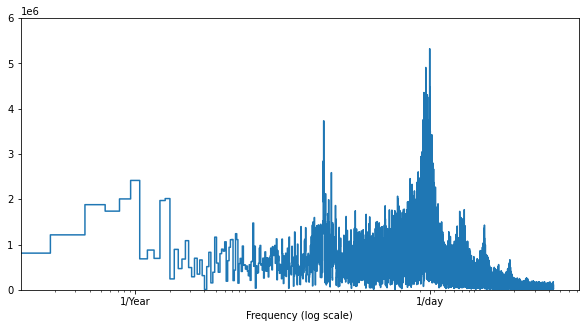

In [48]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Let's also break down the date_time components into other fields.

In [49]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

In [50]:
df_5 = df_4.copy()

In [51]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

In [52]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  weather_Clear         48204 non-null  uint8  
 12  weather_Clouds        48204 non-null  uint8  
 13  weather_Drizzle       48204 non-null  uint8  
 14  weather_Fog           48204 non-nul